In [3]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
sam = sam_model_registry["vit_h"](checkpoint="/home/julius/models/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
predictor.set_image('Datasets/Replica/room0/results/frame000001.jpg')
masks, _, _ = predictor.predict()

AttributeError: 'str' object has no attribute 'shape'

In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam_checkpoint = "/home/julius/models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
import cv2
image = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)

(680, 1200, 3)


In [7]:
masks[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 26319,
 'bbox': [829, 46, 208, 156],
 'predicted_iou': 1.0450944900512695,
 'point_coords': [[1031.25, 53.125]],
 'stability_score': 0.9830170273780823,
 'crop_box': [0, 0, 1200, 680]}

In [7]:
import backproject
samples = backproject.sample_from_instances(masks, points_per_instance=3).reshape(2,-1)

In [17]:
p = []
for e in masks:
    p.append(e['point_coords'])
p = np.concatenate(p)
p

array([[1031.25 ,   53.125],
       [ 318.75 ,   31.875],
       [1143.75 ,  393.125],
       [ 806.25 ,  648.125],
       [  18.75 ,   10.625],
       [ 581.25 ,   74.375],
       [ 993.75 ,  669.375],
       [ 356.25 ,  648.125],
       [ 993.75 ,   31.875],
       [ 393.75 ,  350.625],
       [ 543.75 ,  350.625],
       [1181.25 ,   10.625],
       [  56.25 ,  414.375],
       [  56.25 ,  414.375],
       [1031.25 ,  244.375],
       [  93.75 ,  265.625],
       [ 543.75 ,  159.375],
       [ 543.75 ,  605.625],
       [ 918.75 ,  286.875],
       [ 543.75 ,  541.875],
       [ 318.75 ,  584.375],
       [ 881.25 ,   95.625],
       [ 843.75 ,  180.625],
       [ 918.75 ,   95.625],
       [  18.75 ,  393.125],
       [ 881.25 ,   74.375],
       [ 843.75 ,  159.375],
       [ 918.75 ,  159.375],
       [ 881.25 ,  159.375],
       [ 956.25 ,  180.625],
       [ 956.25 ,   74.375],
       [ 993.75 ,  116.875],
       [ 506.25 ,   31.875],
       [ 956.25 ,   53.125],
       [ 918.7

(680, 1200, 3)


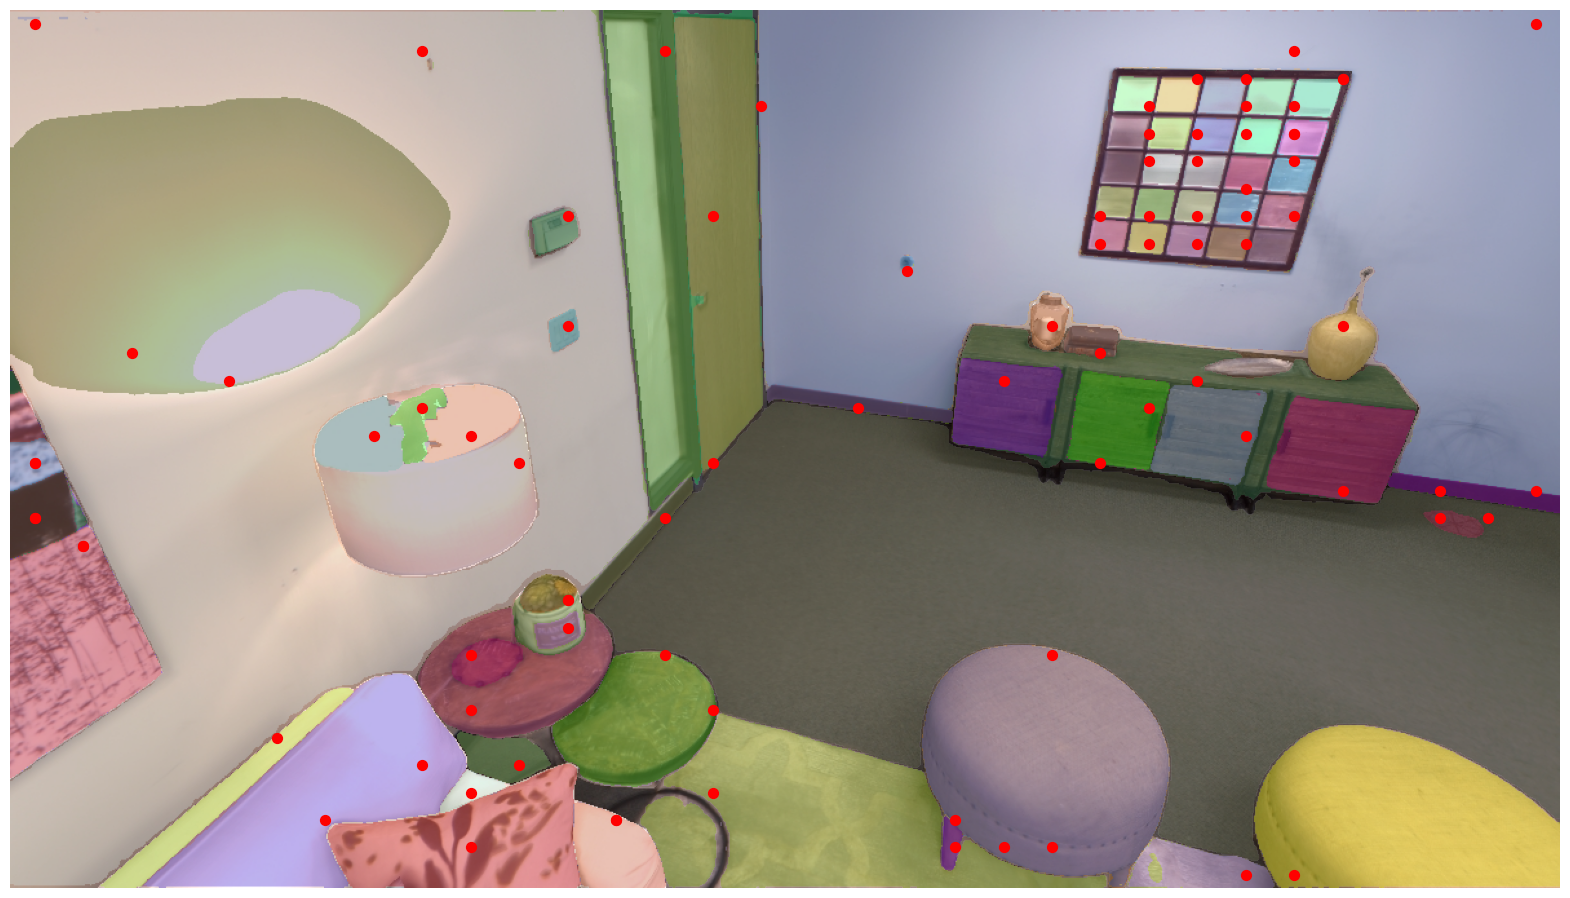

In [19]:
import cv2
image = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#samples = backproject.sample_from_instances(masks, points_per_instance=1).reshape(2,-1).numpy()
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
"""plt.annotate('25, 50', xy=(100,100), xycoords='data',
             xytext=(0.5, 0.5), textcoords='figure fraction',
             arrowprops=dict(arrowstyle="->"))"""
plt.scatter(p[:,0],p[:,1], s=50, c='red', marker='o')
plt.axis('off')
plt.show() 

In [16]:
masks[3]['point_coords']

[[806.25, 648.125]]

In [8]:
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
for m in masks:
    print(m.keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
dict_keys(['segmentation', '

In [ ]:
masks[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False]]),
 'area': 25700,
 'bbox': [953, 546, 246, 133],
 'predicted_iou': 1.0220232009887695,
 'point_coords': [[956.25, 626.875]],
 'stability_score': 0.9908552169799805,
 'crop_box': [0, 0, 1200, 680]}

In [ ]:
def masks2encoding(masks):
    onehot = np.zeros((masks[0]['segmentation'].shape[0], masks[0]['segmentation'].shape[1], len(masks)))
    for i, e in enumerate(masks):
        encoding = e['segmentation']
        onehot[...,i] = encoding
    return np.argmax(onehot, axis=-1)

In [ ]:
onehot = np.zeros((masks[0]['segmentation'].shape[0], masks[0]['segmentation'].shape[1], len(masks)))
for i, e in enumerate(masks):
    encoding = e['segmentation']
    onehot[...,i] = encoding
print(np.argmax(onehot, axis=-1))

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
id = np.argmax(onehot, axis=-1)

In [ ]:
np.save('/home/julius/Project/nice-slam/segmentation/data/room0/seg000001.npy', id)

In [ ]:
def path2instances(path, mask_generator):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    masks = mask_generator.generate(image)
    instances = masks2encoding(masks)
    return instances

In [ ]:
path = '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000001.jpg'
path2instances(path, mask_generator)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
paths = ['/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000005.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000010.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000015.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000020.jpg','/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000025.jpg']
paths

['/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000000.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000005.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000010.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000015.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000020.jpg',
 '/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame000025.jpg']

In [ ]:
import create_instance_seg as cis
import os

In [ ]:
sam = cis.create_sam()

In [ ]:
for path in paths:
    instances = cis.path2instances(path, sam)
    save_path = os.path.join('/home/julius/Project/nice-slam/segmentation/data/room0', path.split("/")[-1].replace("frame","seg").replace("jpg", "npy"))
    print(save_path)
    cis.instance_encoding2file(instances, save_path)

/home/julius/Project/nice-slam/segmentation/data/room0/seg000000.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000005.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000010.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000015.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000020.npy
/home/julius/Project/nice-slam/segmentation/data/room0/seg000025.npy


Backproject

In [ ]:
import torch
import numpy as np
import cv2

In [ ]:
path_to_traj = "/home/julius/Project/nice-slam/Datasets/Replica/room0/traj.txt"
T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)
path_to_frames = "/home/julius/Project/nice-slam/Datasets/Replica/room0/results/"

# caution: path[0] is reserved for script path (or '' in REPL)
scale = 1
args = None


print(T_wc[0])

[[-3.20569622e-01  4.48055195e-01 -8.34554767e-01  3.45298742e+00]
 [ 9.47224956e-01  1.51635452e-01 -2.82438617e-01  4.54611013e-01]
 [ 1.07897793e-16 -8.81052344e-01 -4.73018782e-01  5.93628545e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
def readDepth(filepath):
    depth=cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [ ]:

path_to_frames = "/home/julius/Project/nice-slam/Datasets/Replica/room0/results/"
image = cv2.imread(path_to_frames + "frame000000.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
intrinsic = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])
inverse_intrinsic = np.linalg.inv(intrinsic)

print(inverse_intrinsic)
depth = readDepth(path_to_frames + "depth000000.png")
color_data = torch.from_numpy(image)

print(depth.shape)
print(color_data.shape)

[[ 0.00166667  0.         -0.99916667]
 [ 0.          0.00166667 -0.56583333]
 [ 0.          0.          1.        ]]
torch.Size([680, 1200])
torch.Size([680, 1200, 3])


In [ ]:
Depthf = readDepth(path_to_frames + "depth000000.png")
Depthg = readDepth(path_to_frames + "depth000005.png")

In [13]:
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])
K_inv = np.array([[1/K[0,0], 0.0, -K[0,2]/K[0,0]], [0.0, 1/K[1,1], -K[1,2]/K[1,1]], [0.0, 0.0, 1.0]])

In [28]:
def T_inv(T):
    R = T[:3,:3]
    t = T[:3,3]
    T_inv = np.zeros((4,4))
    T_inv[:3,:3] = R.T
    T_inv[:3,3] = -R.T @ t
    T_inv[3,3] = 1
    return T_inv
    

In [ ]:
Tf = T_wc[0]
Tg = T_wc[5]
Tf_inv = T_inv(Tf)
Tg_inv = T_inv(Tg)

In [ ]:
uv = np.array([2,3])
uv

array([2, 3])

In [ ]:
tmp = np.concatenate([uv, np.ones(1)])
tmp

array([2., 3., 1.])

In [ ]:
tmp = K_inv @ tmp
tmp

array([-0.99583333, -0.56083333,  1.        ])

In [ ]:
tmp = tmp*Depthf[uv[1], uv[0]].numpy() #real world in camera coordinates
tmp

array([-1.20423885, -0.67820314,  1.20927751])

In [ ]:
tmp = np.concatenate([tmp, np.ones(1)])
tmp

array([-1.20423885, -0.67820314,  1.20927751,  1.        ])

In [ ]:
tmp = Tf_inv @ tmp #real world coordinates
tmp

array([ 0.41993543, -2.80088817,  3.91544733,  1.        ])

In [ ]:
tmp = Tg @ tmp
tmp

array([-1.21350888, -0.50405668,  1.15412085,  1.        ])

In [ ]:
tmp = tmp[:3] #real world coordinates in camera coordinates of g
tmp

array([-1.21350888, -0.50405668,  1.15412085])

In [ ]:
tmp = tmp/tmp[-1]
tmp

array([-1.05145738, -0.43674515,  1.        ])

In [ ]:
tmp = K @ tmp
tmp

array([-31.37442502,  77.45290983,   1.        ])

In [ ]:
tmp = tmp[:-1] #uv coordinates of g
tmp

array([-31.37442502,  77.45290983])

In [31]:
import backproject
import numpy as np
import cv2
import torch

In [32]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [33]:
def readDepth(filepath):
    depth=cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [34]:
"""from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam_checkpoint = "/home/julius/models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)"""

'from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor\n\n\nsam_checkpoint = "/home/julius/models/sam_vit_h_4b8939.pth"\nmodel_type = "vit_h"\n\ndevice = "cuda"\n\nsam = sam_model_registry[model_type](checkpoint=sam_checkpoint)\nsam.to(device=device)\n\nmask_generator = SamAutomaticMaskGenerator(sam)'

In [102]:
path_to_traj = "/home/koerner/Project/nice-slam/Datasets/gt_own/room0/traj.txt"
path_to_frames2 = "/home/koerner/Project/nice-slam/Datasets/gt_own/room0/results2/"
path_to_frames = "/home/koerner/Project/nice-slam/Datasets/gt_own/room0/results/"

# caution: path[0] is reserved for script path (or '' in REPL)
scale = 1
args = None

T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)
print(T_wc[0])

[[-3.20569622e-01  4.48055195e-01 -8.34554767e-01  3.45298742e+00]
 [ 9.47224956e-01  1.51635452e-01 -2.82438617e-01  4.54611013e-01]
 [ 1.07897793e-16 -8.81052344e-01 -4.73018782e-01  5.93628545e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [103]:
Tf = T_wc[300]
Tg = T_wc[100]
Depthf = readDepth(path_to_frames + "depth000300.png")
Depthg = readDepth(path_to_frames + "depth000100.png")

In [104]:
uv = np.array([[900,300],[300,300],[300,600],[600,100]]).T
uv

array([[900, 300, 300, 600],
       [300, 300, 600, 100]])

(680, 1200, 3)


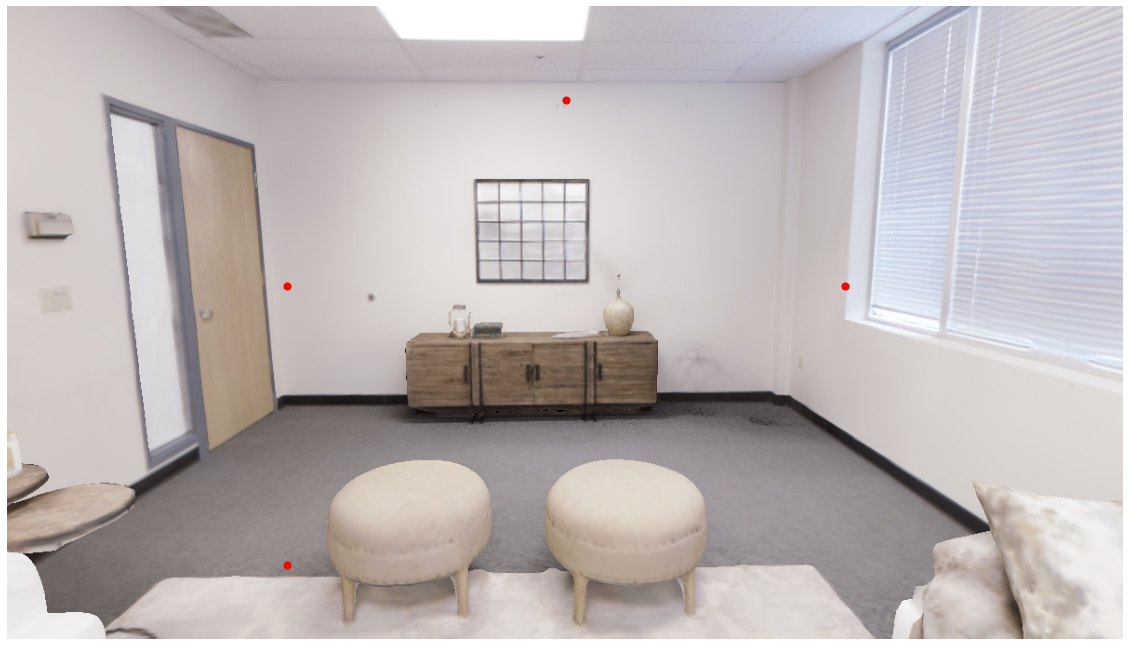

In [105]:
import cv2
image = '/home/koerner/Project/nice-slam/Datasets/gt_own/room0/results/frame000300.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#masks = mask_generator.generate(image)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
#show_anns(masks)
plt.scatter(uv[0,:], uv[1,:], s=50, c='red', marker='o')
plt.axis('off')
plt.show() 

In [106]:
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])

uv2, zg = backproject.backproject(uv, Tf, Tg, K, Depthf)
uv2

array([[1123,  436,  380,  733],
       [ 458,  425,  794,  226]])

(680, 1200, 3)


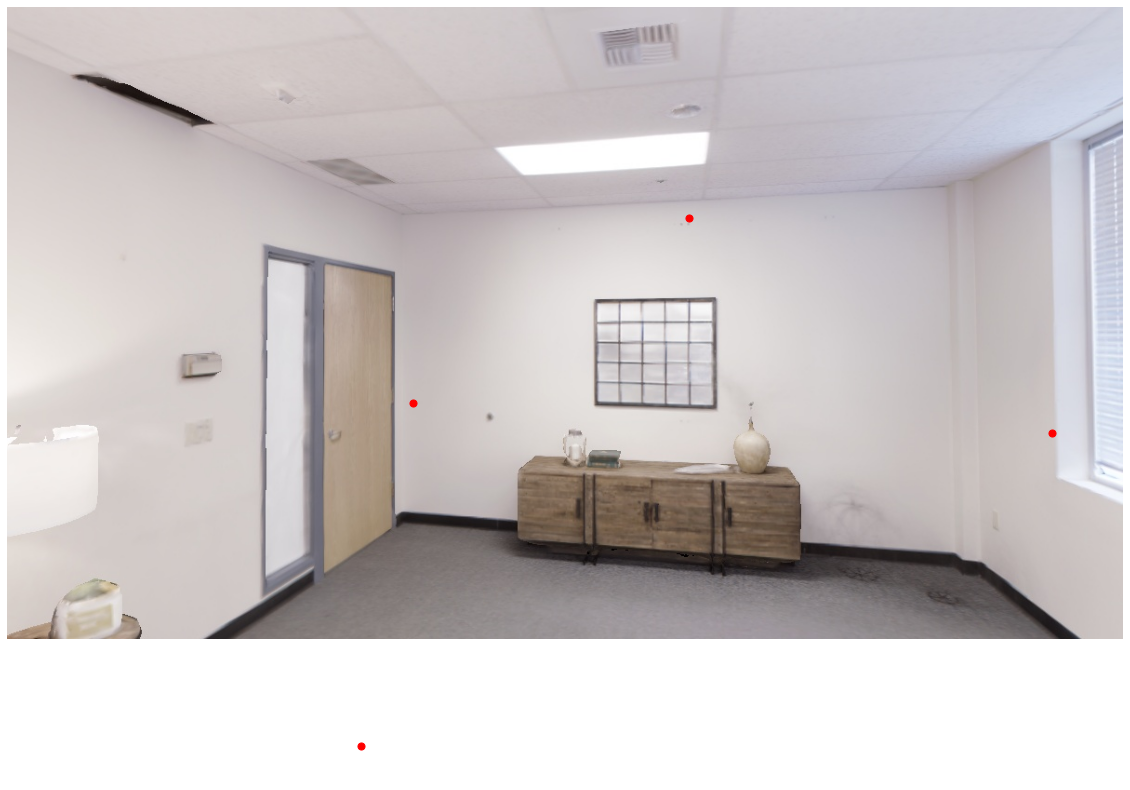

In [107]:
import cv2
image = '/home/koerner/Project/nice-slam/Datasets/gt_own/room0/results/frame000100.jpg'
image = cv2.imread(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#masks = mask_generator.generate(image)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
#show_anns(masks)
plt.scatter(uv2[0], uv2[1], s=50, c='red', marker='o')
plt.axis('off')
plt.show() 

In [108]:
Depthg[uv2[1,1].astype(int)+1, uv2[0,1].astype(int)+1], zg 

(tensor(4.9128), array([3.07476161, 4.91585804, 2.27688721, 4.4317029 ]))

In [109]:
def T_inv(T):
    R = T[:3,:3]
    t = T[:3,3]
    T_inv = np.zeros((4,4))
    T_inv[:3,:3] = R.T
    T_inv[:3,3] = -R.T @ t
    T_inv[3,3] = 1
    return T_inv
    

In [110]:
K_inv = np.array([[1/K[0,0], 0.0, -K[0,2]/K[0,0]], [0.0, 1/K[1,1], -K[1,2]/K[1,1]], [0.0, 0.0, 1.0]])
Tg_inv = T_inv(Tg)


In [111]:
uv = np.arange(10).reshape(2,5)
print(uv)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [112]:
K_inv = np.array([[1/K[0,0], 0.0, -K[0,2]/K[0,0]], [0.0, 1/K[1,1], -K[1,2]/K[1,1]], [0.0, 0.0, 1.0]])
Tg_inv = T_inv(Tg)
tmp = np.concatenate([uv, np.ones((1,uv.shape[1]))])
tmp = K_inv @ tmp
tmp = tmp*Depthf[uv[1], uv[0]].numpy() #real world in camera coordinates
tmp = np.concatenate([tmp, np.ones((1,tmp.shape[1]))])
tmp = Tf @ tmp #real world coordinates
tmp = Tg_inv @ tmp
tmp = tmp[:3,:] #real world coordinates in camera coordinates of g
zg = tmp[-1] #zg has to align with the depthg
tmp = tmp/tmp[-1]
tmp = K @ tmp
tmp = tmp[:2,:] #uv coordinates of g

In [14]:
path_to_traj = "/home/koerner/nice-slam/Datasets/Replica/room0/traj.txt"
T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)

In [15]:
import copy
c2w = copy.deepcopy(T_wc)


In [57]:
point = np.array([1,2,2.5,1])

In [58]:
c2w[:3, 1] *= -1
c2w[:3, 2] *= -1

In [59]:
p_c2w = (c2w@point)[:,:-1]
p_t = (T_wc@point)[:,:-1]

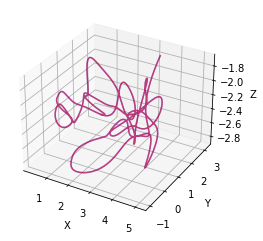

In [60]:
import matplotlib.pyplot as plt



# Plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(p_c2w[:,0], p_c2w[:,1], p_c2w[:,2], color = "blue", alpha = 0.5)
ax.plot(p_t[:,0], p_t[:,1], p_t[:,2], color = "red", alpha = 0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


ValueError: Wrong number of arguments. Expected 6 got 3

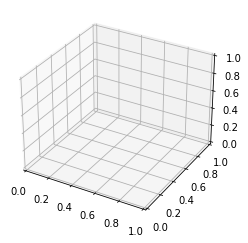

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation

# Extract the rotation matrices from c2w
rotations = c2w[:5, :3, :3]

# Convert the rotation matrices to quaternions
quaternions = Rotation.from_matrix(rotations).as_quat()

# Plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(quaternions[:, 1], quaternions[:, 2], quaternions[:, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
